<font size=10em>statistics python</font>

# preparation

In [1]:
import os
from pathlib import Path
from glob import glob
from tqdm.notebook import tqdm

import json
from slack_sdk import WebClient

from scipy import stats
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic', context='talk')

In [2]:
# import data from seaborn
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# descriptive statistics

## distribution

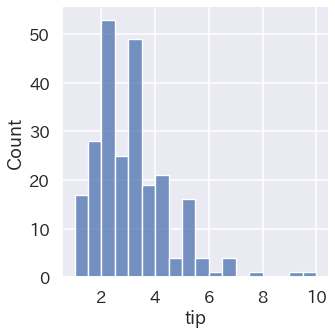

In [3]:
# Histograms are used for continuous variables
sns.displot(data=df['tip'])

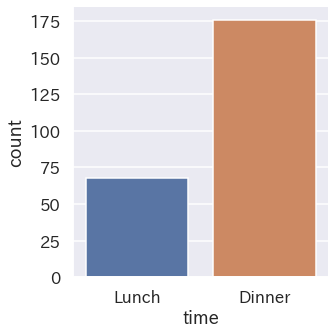

In [4]:
sns.catplot(x='time', data=df, kind='count')

## mean

In [5]:
np.mean(df['tip'])

2.9982786885245902

In [6]:
np.mean(df['tip_rate'])

0.16080258172250478

In [7]:
df['tip_rate'].mean()

0.16080258172250478

In [8]:
df.groupby('sex').mean()

,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [9]:
df.groupby('sex').mean()['tip_rate']

sex
Male      0.157651
Female    0.166491
Name: tip_rate, dtype: float64

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

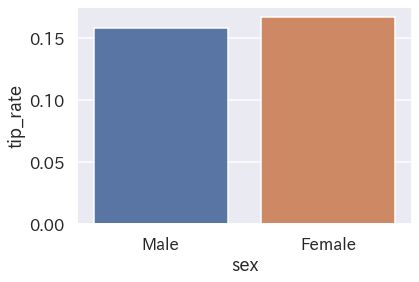

In [10]:
sns.barplot(x='sex', y='tip_rate', data=df, ci=None)

<AxesSubplot:xlabel='sex'>

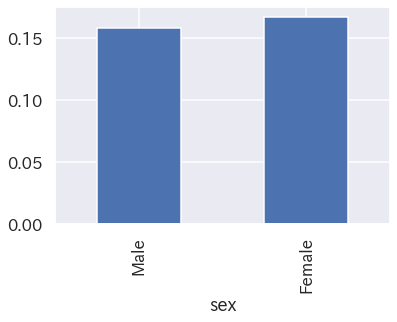

In [11]:
df.groupby('sex').mean()['tip_rate'].plot(kind='bar')

## median

In [12]:
np.median(df['tip_rate'])

0.15476977125802577

In [13]:
df['tip_rate'].median()

0.15476977125802577

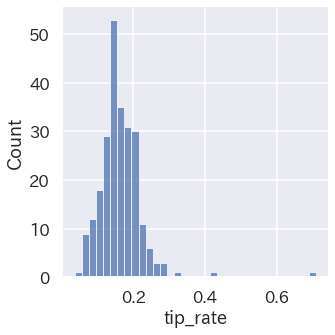

In [14]:
sns.displot(df['tip_rate'])

In [15]:
df.groupby('sex').median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

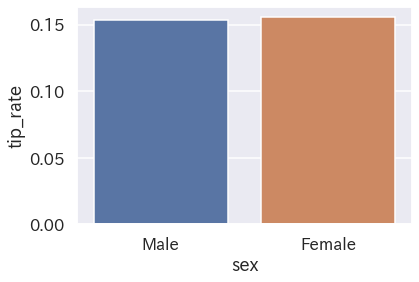

In [16]:
sns.barplot(x='sex', y='tip_rate', data=df, estimator=np.median, ci=None)

In [17]:
df.sort_values('tip_rate', ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## mode

In [18]:
mode, count = stats.mode(df)

In [19]:
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


In [20]:
df['size'].mode()

0    2
Name: size, dtype: int64

## range

In [21]:
np.min(df['tip'])

1.0

In [22]:
df['tip'].min()

1.0

In [23]:
np.max(df['tip'])

10.0

In [24]:
df['tip'].max()

10.0

In [25]:
(df['tip'].max()) - (df['tip'].min())

9.0

## quartile

In [26]:
np.quantile(df['tip_rate'], [0.25, 0.5, 0.75])

array([0.12912736, 0.15476977, 0.19147549])

In [27]:
df['tip_rate'].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [28]:
stats.iqr(df['tip_rate'])

0.06234812458689151

In [29]:
0.191475 - 0.129127

0.062348000000000015

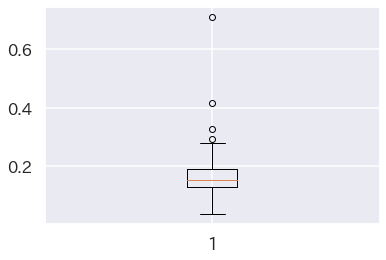

In [30]:
plt.boxplot(df['tip_rate'])
plt.show()

<AxesSubplot:xlabel='size', ylabel='tip_rate'>

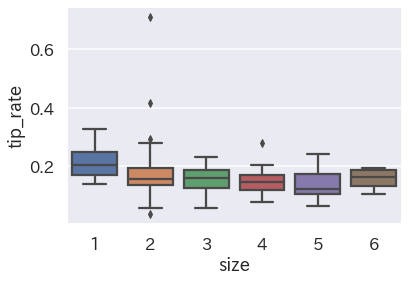

In [31]:
sns.boxplot(x='size', y='tip_rate', data=df)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

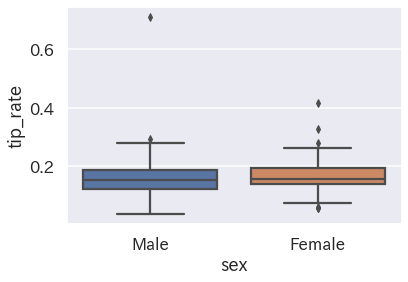

In [32]:
sns.boxplot(x='sex', y='tip_rate', data=df)

## variance

In [33]:
np.var(df['tip'])

1.9066085124966428

## std

In [34]:
np.std(df['tip'])

1.3807999538298958

In [35]:
np.sqrt(np.var(df['tip']))

1.3807999538298958

# descriptive statistics between two variables

## covariance

In [36]:
np.cov(df['total_bill'], df['tip'], bias=True)

array([[78.92813149,  8.28938892],
       [ 8.28938892,  1.90660851]])

In [37]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)#.shape
np.cov(x)

array([[79.25293861,  8.32350163,  5.06598344],
       [ 8.32350163,  1.91445464,  0.64390643],
       [ 5.06598344,  0.64390643,  0.90459084]])

In [38]:
df.cov()

,total_bill,tip,size,tip_rate
total_bill,79.252939,8.323502,5.065983,-0.184107
tip,8.323502,1.914455,0.643906,0.028931
size,5.065983,0.643906,0.904591,-0.008298
tip_rate,-0.184107,0.028931,-0.008298,0.003730


## correlation coefficient

In [39]:
np.corrcoef(df['total_bill'], df['tip'])

array([[1.        , 0.67573411],
       [0.67573411, 1.        ]])

In [40]:
x = np.stack([df['total_bill'], df['tip'], df['size']], axis=0)#.shape
np.corrcoef(x)

array([[1.        , 0.67573411, 0.59831513],
       [0.67573411, 1.        , 0.48929878],
       [0.59831513, 0.48929878, 1.        ]])

In [41]:
df.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

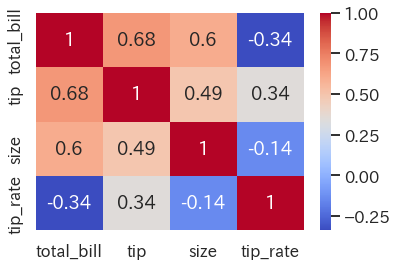

In [42]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

## association

In [43]:
pd.crosstab(df['sex'], df['time'])

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [44]:
cont_table = pd.crosstab(df['sex'], df['time'])
stats.chi2_contingency(cont_table, correction=False)

(10.277251918677742,
 0.0013468039268008766,
 1,
 array([[ 43.75409836, 113.24590164],
        [ 24.24590164,  62.75409836]]))

## cramer's coefficient of association

In [71]:
def cramers_v(data, col1, col2):
    cont_table = pd.crosstab(data[col1], data[col2])
    chi2 = stats.chi2_contingency(cont_table, correction=False)[0]
    n = len(data[col1])
    v = np.sqrt(chi2 / ((min(cont_table.shape) - 1) * n))
    return v

In [73]:
v = cramers(data=df, col1='sex', col2='time')
v

0.20523129613344476

# probability

## probability distribution

In [77]:
# rvs: random variates
stats.randint.rvs(1, 7)

6

In [78]:
stats.uniform.rvs(0, 1)

0.8109952088531586